In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_10 = pd.read_csv('./dataset/listingsOctober.csv', encoding='Latin-1', sep=',', error_bad_lines=False, index_col=False, low_memory=False)
df_11 = pd.read_csv('./dataset/listingsNovember.csv', encoding='Latin-1', sep=',', error_bad_lines=False, index_col=False, low_memory=False)

In [3]:
df = pd.concat([df_10, df_11], ignore_index=True)

In [4]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101009 entries, 0 to 101008
Data columns (total 96 columns):
id                                  101009 non-null int64
listing_url                         101009 non-null object
scrape_id                           101009 non-null int64
last_scraped                        101009 non-null object
name                                100965 non-null object
summary                             97223 non-null object
space                               69350 non-null object
description                         100110 non-null object
experiences_offered                 101009 non-null object
neighborhood_overview               60078 non-null object
notes                               40229 non-null object
transit                             62658 non-null object
access                              58290 non-null object
interaction                         56066 non-null object
house_rules                         60237 non-null object
thumbnail_url 

In [5]:
df['property_type'].value_counts()

Apartment                 81404
House                      7468
Townhouse                  3224
Loft                       3071
Condominium                2529
Serviced apartment         1330
Guest suite                 485
Other                       325
Bed and breakfast           226
Resort                      204
Boutique hotel              190
Hostel                      121
Guesthouse                  118
Hotel                        80
Bungalow                     59
Villa                        48
Tiny house                   31
Boat                         22
Aparthotel                   19
Tent                          9
Cottage                       9
Camper/RV                     8
Cabin                         7
Casa particular (Cuba)        4
Houseboat                     3
Nature lodge                  3
Castle                        3
Train                         2
Timeshare                     2
Cave                          2
Chalet                        1
Island  

threshold=1000
df['count'] = df.groupby('property_type')['property_type'].transform(pd.Series.value_counts)
df=df[df['count']>=threshold]
df.drop(['count'], axis = 1, inplace = True)

df['property_type'].value_counts()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101009 entries, 0 to 101008
Data columns (total 96 columns):
id                                  101009 non-null int64
listing_url                         101009 non-null object
scrape_id                           101009 non-null int64
last_scraped                        101009 non-null object
name                                100965 non-null object
summary                             97223 non-null object
space                               69350 non-null object
description                         100110 non-null object
experiences_offered                 101009 non-null object
neighborhood_overview               60078 non-null object
notes                               40229 non-null object
transit                             62658 non-null object
access                              58290 non-null object
interaction                         56066 non-null object
house_rules                         60237 non-null object
thumbnail_url 

In [7]:
df = df.groupby('property_type').filter(lambda x : len(x)>100)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100695 entries, 0 to 101008
Data columns (total 96 columns):
id                                  100695 non-null int64
listing_url                         100695 non-null object
scrape_id                           100695 non-null int64
last_scraped                        100695 non-null object
name                                100651 non-null object
summary                             96937 non-null object
space                               69149 non-null object
description                         99805 non-null object
experiences_offered                 100695 non-null object
neighborhood_overview               59915 non-null object
notes                               40110 non-null object
transit                             62517 non-null object
access                              58137 non-null object
interaction                         55909 non-null object
house_rules                         60047 non-null object
thumbnail_url  

In [9]:
df_cols = df[[
    'id',
    'host_id',
    'zipcode',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'availability_30',
    'minimum_nights',
    'bathrooms',
]]


In [10]:
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100695 entries, 0 to 101008
Data columns (total 16 columns):
id                        100695 non-null int64
host_id                   100695 non-null int64
zipcode                   99181 non-null object
neighbourhood_cleansed    100695 non-null object
property_type             100695 non-null object
room_type                 100695 non-null object
accommodates              100695 non-null int64
bedrooms                  100583 non-null float64
beds                      100570 non-null float64
bed_type                  100695 non-null object
price                     100695 non-null object
number_of_reviews         100695 non-null int64
review_scores_rating      77499 non-null float64
availability_30           100695 non-null int64
minimum_nights            100695 non-null int64
bathrooms                 100501 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 13.1+ MB


In [11]:
# determine the number of missing entries in each column
for col in df_cols.columns:
    print (col + ', Number of Missing Values:', len(df_cols[col][df_cols[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
zipcode, Number of Missing Values: 1514
neighbourhood_cleansed, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bedrooms, Number of Missing Values: 112
beds, Number of Missing Values: 125
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 23196
availability_30, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
bathrooms, Number of Missing Values: 194


In [12]:
original = len(df_cols)
df_cols = df_cols.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print ('Number of NaN values removed:', original - len(df_cols))

Number of NaN values removed: 1861


In [13]:
# drop $ and , 
df_cols['price'] = df_cols['price'].astype(str).str.replace('$', '')
df_cols['price'] = df_cols['price'].astype(str).str.replace(',', '')
df_cols['price'] = df_cols['price'].str.strip()
df_cols['price'] = df_cols['price'].astype(float)


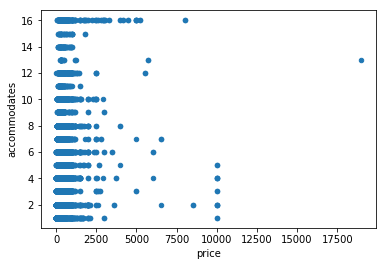

In [14]:
df_cols.plot.scatter('price', 'accommodates')

In [15]:
a = ['Guest suite',           
'Other',                       
'Bed breakfast',       
'Resort',                      
'Boutique hotel',              
'Hostel',                      
'Guesthouse',                  
'Hotel',                        
'Bungalow',                     
'Villa',                        
'Tiny house',                   
'Boat',                         
'Aparthotel'                   
'Tent',                          
'Cottage',                       
'Camper/RV',                     
'Cabin',                       
'Casa particular (Cuba)',        
'Houseboat',                     
'Castle',                        
'Nature lodge',                  
'Train',                         
'Timeshare',                     
'Cave',                          
'Earth house',                   
'Island',                        
'Chalet']

df_cols = df_cols[~df_cols['property_type'].isin(a)]
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97402 entries, 0 to 101008
Data columns (total 16 columns):
id                        97402 non-null int64
host_id                   97402 non-null int64
zipcode                   97402 non-null object
neighbourhood_cleansed    97402 non-null object
property_type             97402 non-null object
room_type                 97402 non-null object
accommodates              97402 non-null int64
bedrooms                  97402 non-null float64
beds                      97402 non-null float64
bed_type                  97402 non-null object
price                     97402 non-null float64
number_of_reviews         97402 non-null int64
review_scores_rating      75049 non-null float64
availability_30           97402 non-null int64
minimum_nights            97402 non-null int64
bathrooms                 97402 non-null float64
dtypes: float64(5), int64(6), object(5)
memory usage: 12.6+ MB


In [16]:
def findAveragePrice(location):
    return (df_cols[(df_cols.neighbourhood_cleansed == location)])

area = findAveragePrice('Williamsburg')
area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8187 entries, 3 to 100971
Data columns (total 16 columns):
id                        8187 non-null int64
host_id                   8187 non-null int64
zipcode                   8187 non-null object
neighbourhood_cleansed    8187 non-null object
property_type             8187 non-null object
room_type                 8187 non-null object
accommodates              8187 non-null int64
bedrooms                  8187 non-null float64
beds                      8187 non-null float64
bed_type                  8187 non-null object
price                     8187 non-null float64
number_of_reviews         8187 non-null int64
review_scores_rating      6430 non-null float64
availability_30           8187 non-null int64
minimum_nights            8187 non-null int64
bathrooms                 8187 non-null float64
dtypes: float64(5), int64(6), object(5)
memory usage: 1.1+ MB


In [17]:
#area.price.quantile(0.99)

In [18]:
#area = area[area.price < area.price.quantile(.99)]

In [19]:
area_describe = area.describe().T
area_describe

,count,mean,std,min,25%,50%,75%,max
id,8187.0,1.455301e+07,8.569361e+06,3330.0,7153503.5,15083341.0,21825477.5,29763219.0
host_id,8187.0,3.616529e+07,4.983034e+07,4177.0,3930530.5,14269481.0,45303715.0,223917190.0
accommodates,8187.0,2.676438e+00,1.713112e+00,1.0,2.0,2.0,3.0,16.0
bedrooms,8187.0,1.203127e+00,6.952774e-01,0.0,1.0,1.0,1.0,10.0
beds,8187.0,1.437767e+00,8.780408e-01,0.0,1.0,1.0,2.0,13.0
price,8187.0,1.403284e+02,1.251240e+02,0.0,70.0,101.0,175.0,2921.0
number_of_reviews,8187.0,2.046525e+01,3.976246e+01,0.0,1.0,5.0,20.0,347.0
review_scores_rating,6430.0,9.474308e+01,7.517011e+00,20.0,93.0,97.0,100.0,100.0
availability_30,8187.0,4.108953e+00,7.521910e+00,0.0,0.0,0.0,5.0,30.0
minimum_nights,8187.0,5.687187e+00,1.465110e+01,1.0,2.0,3.0,5.0,365.0


In [20]:
area_describe['iqr_max'] = area_describe['75%'] + 1.5 * (area_describe['75%'] - area_describe['25%'])
area_describe['iqr_min'] = area_describe['75%'] - 1.5 * (area_describe['75%'] - area_describe['25%'])

cols_to_drop_outliers = ['minimum_nights', 'price']

for col in cols_to_drop_outliers:
    print(col)
    df_cols = df_cols[((df_cols[col] > area_describe.loc[col, 'iqr_min']) & (df_cols[col] < area_describe.loc[col, 'iqr_max']))]

minimum_nights
price


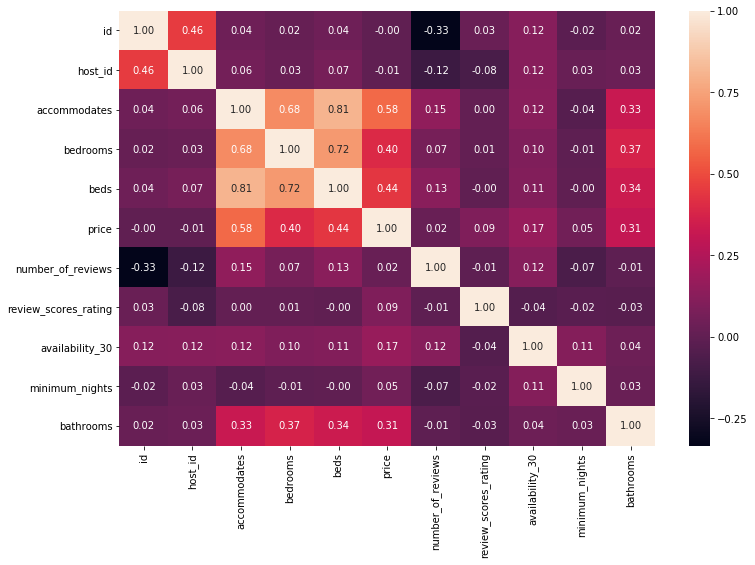

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(area.corr(), annot=True, fmt=".2f");
plt.show()

In [22]:
df_standardize = df_cols

## Linear Regression

In [23]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [24]:
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df_standardize[col] = df_standardize[col].astype(float)
    df_standardize[col] = standardize_col(df_standardize[col])

df_standardize.head()

,id,host_id,zipcode,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,availability_30,minimum_nights,bathrooms
0,2515,2758,10026,Harlem,Apartment,Private room,0.198164,-0.173993,0.572153,Real Bed,59.0,3.495485,93.0,0.506230,-0.352120,-0.264501
1,2539,2787,11218,Kensington,Apartment,Private room,0.829813,-0.173993,1.668836,Real Bed,149.0,-0.377414,98.0,2.230262,-0.945397,-0.264501
2,2595,2845,10018,Midtown,Apartment,Entire home/apt,-0.433485,-1.789911,-0.524530,Real Bed,225.0,0.279805,94.0,1.655585,-0.945397,-0.264501
3,3330,4177,11206,Williamsburg,Apartment,Private room,-0.433485,-0.173993,-0.524530,Real Bed,70.0,0.232861,97.0,-0.528189,1.427712,-0.264501
4,3647,4632,10027,Harlem,Apartment,Private room,-0.433485,-0.173993,-0.524530,Pull-out Sofa,150.0,-0.565191,NaN,2.804939,0.241157,-0.264501


In [25]:
def findAveragePriceStandardize(location):
    return (df_standardize[(df_standardize.neighbourhood_cleansed == location)])

areaStandardize = findAveragePriceStandardize('Allerton')
areaStandardize.drop(['neighbourhood_cleansed'], axis=1)
areaStandardize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 591 to 100973
Data columns (total 16 columns):
id                        56 non-null int64
host_id                   56 non-null int64
zipcode                   56 non-null object
neighbourhood_cleansed    56 non-null object
property_type             56 non-null object
room_type                 56 non-null object
accommodates              56 non-null float64
bedrooms                  56 non-null float64
beds                      56 non-null float64
bed_type                  56 non-null object
price                     56 non-null float64
number_of_reviews         56 non-null float64
review_scores_rating      53 non-null float64
availability_30           56 non-null float64
minimum_nights            56 non-null float64
bathrooms                 56 non-null float64
dtypes: float64(9), int64(2), object(5)
memory usage: 7.4+ KB


In [26]:
regStandardize = linear_model.LinearRegression()
regStandardize.fit(areaStandardize[['accommodates', 'beds', 'bedrooms', 'bathrooms']], areaStandardize.price)
#fit == training a model with the available points

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(areaStandardize[['accommodates', 'beds', 'bedrooms', 'bedrooms']],
    areaStandardize['price'], test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.6530865553282417

## Gradient Boosting Regressor

In [28]:
import math
import eli5
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from eli5.sklearn import PermutationImportance


In [29]:
median_beds = math.floor(df_cols.beds.median())
median_bedrooms = math.floor(df_cols.bedrooms.median())
median_bathrooms = math.floor(df_cols.bathrooms.median())

df_cols['beds'] = df_cols['beds'].fillna(value=median_beds)
df_cols['bedrooms'] = df_cols['bedrooms'].fillna(value=median_bedrooms)
df_cols['bathrooms'] = df_cols['bathrooms'].fillna(value=median_bathrooms)

In [30]:
y = df_cols['price']
X = df_cols.drop(['price', 'bed_type', 'neighbourhood_cleansed', 'property_type', 'room_type', 'zipcode', 'review_scores_rating', 'id', 'host_id' ], axis=1) 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [31]:

%%time 
regr = GradientBoostingRegressor(n_estimators=75, learning_rate=0.31, max_depth=4, subsample=1.0,
                                 random_state=42)
regr.fit(X_train, y_train)
print(r2_score(y_val, regr.predict(X_val)))


0.3590994636394891
CPU times: user 3.6 s, sys: 85.5 ms, total: 3.68 s
Wall time: 3.99 s


In [32]:
perm = PermutationImportance(regr, random_state=42).fit(X_val, y_val)
eli5.show_weights(perm, top=X.shape[1], feature_names = X.columns.tolist())


Weight,Feature
0.4812 ± 0.0104,accommodates
0.1074 ± 0.0024,bedrooms
0.0275 ± 0.0027,minimum_nights
0.0269 ± 0.0024,number_of_reviews
0.0261 ± 0.0026,bathrooms
0.0169 ± 0.0016,availability_30
0.0168 ± 0.0019,beds
